In [1]:
import numpy as np
import astropy.units as u
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
%config InlineBackend.figure_format = 'retina'

pd.set_option("display.max_columns", None)
plt.rc('font', family='serif')
plt.rcParams['text.usetex'] = False
fs = 24

# update various fontsizes to match
params = {'figure.figsize': (12, 8),
          'legend.fontsize': fs,
          'axes.labelsize': fs,
          'xtick.labelsize': 0.9 * fs,
          'ytick.labelsize': 0.9 * fs,
          'axes.linewidth': 1.1,
          'xtick.major.size': 7,
          'xtick.minor.size': 4,
          'ytick.major.size': 7,
          'ytick.minor.size': 4}
plt.rcParams.update(params)
plt.style.use('dark_background')

In [3]:
import cogsworth
p = cogsworth.pop.Population(2000, processes=6)
p

<Population - 2000 systems - galactic_potential=MilkyWayPotential, SFH=Frankel2018>


Though this class is initialised, we still need to actually create the population to find its present day state. We do this by running:

In [4]:
p.create_population()

Run for 2000 binaries
Ended up with 2027 binaries with m1 > 0 solar masses
[2e-02s] Sample initial binaries
[1.1s] Evolve binaries (run COSMIC)


100%|██████████| 2027/2027 [00:10<00:00, 187.81it/s]


[14.4s] Get orbits (run gala)
Overall: 15.6s


In [5]:
p.bpp

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
0,0.000000,0.161332,0.090441,0.0,0.0,234.264131,828.182052,0.163737,0.002244,0.002256,1.0,0.000000,0.000000,1.216294e+06,3.869860e+06,0.0,0.0,0.188920,0.145872,0.161332,0.090441,0.004369,0.000711,3429.541959,2478.438017,0.0,0.0,0.080666,0.045221,0.122798,0.094817,0.002013,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
0,8441.628773,0.161332,0.090441,0.0,0.0,234.264131,828.182052,0.163737,0.002247,0.002256,10.0,8441.628773,8441.628773,1.216294e+06,3.869860e+06,0.0,0.0,0.189222,0.145872,0.161332,0.090441,0.004383,0.000711,3429.553444,2479.069670,0.0,0.0,0.080666,0.045221,0.122994,0.094817,0.002007,0.000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.114254,0.107572,0.0,0.0,394.546170,1928.468318,0.705714,0.003407,0.003310,1.0,0.000000,0.000000,2.889216e+06,3.259190e+06,0.0,0.0,0.151979,0.143645,0.114254,0.107572,0.001449,0.001254,2901.864205,2878.630139,0.0,0.0,0.057127,0.053786,0.098787,0.093369,0.000168,0.000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,6595.586921,0.114254,0.107572,0.0,0.0,394.546170,1928.468318,0.705714,0.003409,0.003312,10.0,6595.586921,6595.586921,2.889216e+06,3.259190e+06,0.0,0.0,0.152038,0.143694,0.114254,0.107572,0.001451,0.001255,2901.852374,2878.620057,0.0,0.0,0.057127,0.053786,0.098825,0.093401,0.000168,0.000111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,1.222145,0.532705,1.0,0.0,159.262043,175.841176,0.071562,0.017379,0.010628,1.0,0.000000,0.000000,4.209743e+03,8.941141e+04,0.0,0.0,1.162131,0.486884,1.222145,0.532705,2.589462,0.057594,6822.513684,4070.528447,0.0,0.0,0.005151,0.128216,0.181836,0.182891,2110.759532,9.006048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,1372.521069,0.703392,0.389185,0.0,0.0,45.005920,33.477309,0.106388,0.038200,0.028201,10.0,1372.521069,1372.521069,5.214359e+04,2.479917e+05,0.0,0.0,0.662148,0.373161,0.703392,0.389185,0.136960,0.020079,4334.512630,3572.788387,0.0,0.0,0.070029,0.283383,0.218249,0.251365,57.916882,1.005411,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2024
2025,0.000000,0.900484,0.488735,1.0,0.0,42.130945,26.889865,0.010298,0.044888,0.032680,1.0,0.000000,0.000000,1.340164e+04,1.211224e+05,0.0,0.0,0.809892,0.446185,0.900484,0.488735,0.581362,0.041012,5625.585132,3906.073026,0.0,0.0,0.043844,0.159030,0.232344,0.180441,324.728388,5.006744,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
2025,6657.438671,0.900484,0.488735,1.0,0.0,42.131272,26.890178,0.010298,0.051287,0.033081,10.0,6657.438671,6657.438671,1.340164e+04,1.211224e+05,0.0,0.0,0.925354,0.451671,0.900484,0.488735,0.878821,0.041973,5835.672717,3904.829606,0.0,0.0,0.047984,0.159030,0.276756,0.182659,247.243474,4.885870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2025
2026,0.000000,0.171456,0.093061,0.0,0.0,38.356966,53.531722,0.017675,0.012512,0.011515,1.0,0.000000,0.000000,1.203426e+06,4.084411e+06,0.0,0.0,0.203985,0.142064,0.171456,0.093061,0.004274,0.000748,3282.366282,2543.981679,0.0,0.0,0.085728,0.046531,0.132591,0.092341,0.003003,0.000036,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2026


There are of course **many** things that you can do with this table! But let's say, maybe you want get any binaries that experiences mass transfer

In [7]:
mt_bin_nums = p.bpp[p.bpp["evol_type"] == 3.0]["bin_num"].unique()

Let's take a look at the evolution of the first binary in this list

In [8]:
p.bpp[p.bpp["bin_num"] == mt_bin_nums[0]]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num
2,0.000000,1.222145,0.532705,1.0,0.0,159.262043,175.841176,0.071562,0.017379,0.010628,1.0,0.000000,0.000000,4.209743e+03,89411.406765,0.000000,0.0,1.162131,0.486884,1.222145,0.532705,2.589462,0.057594,6822.513684,4070.528447,0.000000,0.0,5.150571e-03,0.128216,1.818361e-01,0.182891,2110.759532,9.006048,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2
2,4209.743012,1.222145,0.532705,2.0,0.0,159.262041,175.841172,0.071562,0.035106,0.010730,2.0,4209.743012,4209.743012,4.209743e+03,89411.406765,0.145021,0.0,2.347458,0.491541,1.222145,0.532705,6.914401,0.058975,6136.338587,4075.280601,0.120658,0.0,1.146497e-01,0.128216,9.831705e-01,0.184640,586.378610,8.836210,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,2
2,4354.704853,1.221782,0.532705,3.0,0.0,159.294902,175.913799,0.071562,0.037497,0.010730,2.0,4358.914007,4354.700597,4.213882e+03,89411.317897,0.174485,0.0,2.507723,0.491703,1.221782,0.532705,5.753872,0.059027,5670.480500,4075.497807,0.112662,0.0,5.236495e-01,0.128216,1.556791e+00,0.184701,395.256190,8.844429,0.0,0.0,0.0,0.0,0.0,0.0,-4.209155,0.004256,0.0,0.0,2
2,4672.092569,1.167398,0.534728,3.0,0.0,148.782366,161.214241,0.000000,1.000979,0.010583,3.0,4676.301724,4617.121350,4.213882e+03,88358.751293,0.450282,0.0,66.691158,0.494023,1.221782,0.534728,1699.516569,0.059988,4558.446179,4082.374866,0.075190,0.0,7.171166e-01,0.127032,6.661597e+01,0.185107,14.234912,14.234912,0.0,0.0,0.0,0.0,0.0,0.0,-4.209155,54.971219,0.0,0.0,2
2,4672.092569,1.167398,0.534728,3.0,0.0,148.782366,161.214241,0.000000,1.000979,0.010583,7.0,4676.301724,4617.121350,4.213882e+03,88358.751293,0.450282,0.0,66.691158,0.494023,1.221782,0.534728,1699.516569,0.059988,4558.446179,4082.374866,0.075190,0.0,7.171166e-01,0.127032,6.661597e+01,0.185107,14.234912,14.234912,0.0,0.0,0.0,0.0,0.0,0.0,-4.209155,54.971219,0.0,0.0,2
2,4672.092569,0.450282,0.534728,10.0,0.0,8.512437,2.900231,0.000000,1.000979,0.010583,8.0,0.000000,4617.121350,4.213882e+03,88358.751293,0.450282,0.0,66.691158,0.494023,0.450282,0.534728,1699.516569,0.059988,4558.446179,4082.374866,0.075190,0.0,7.171166e-01,0.127032,6.661597e+01,0.185107,14.234912,14.234912,0.0,0.0,0.0,0.0,0.0,0.0,-4.209155,54.971219,0.0,0.0,2
2,4672.092569,0.450282,0.534728,10.0,0.0,8.512437,2.900231,0.000000,0.004851,0.147341,4.0,0.000000,4617.121350,1.000000e+10,88358.751293,0.450282,0.0,0.015038,0.494023,0.450282,0.534728,47.766877,0.059988,124296.158148,4082.374866,0.015038,0.0,1.000000e-10,0.127032,1.000000e-10,0.185107,14.234912,14.234912,0.0,0.0,0.0,0.0,0.0,0.0,4672.092569,54.971219,0.0,0.0,2
2,10641.208659,0.450282,0.534728,10.0,0.0,8.508617,2.898280,0.000000,0.004854,0.149440,10.0,5969.116089,10586.237440,1.000000e+10,88358.751292,0.450282,0.0,0.015038,0.500838,0.450282,0.534728,0.000111,0.062431,4847.994199,4095.153418,0.015038,0.0,1.000000e-10,0.127032,1.000000e-10,0.187661,14.234910,13.850155,0.0,0.0,0.0,0.0,0.0,0.0,4672.092569,54.971219,0.0,0.0,2


We can also put this to use. Let's see how the initial orbital periods are different for binaries that experience mass transfer.

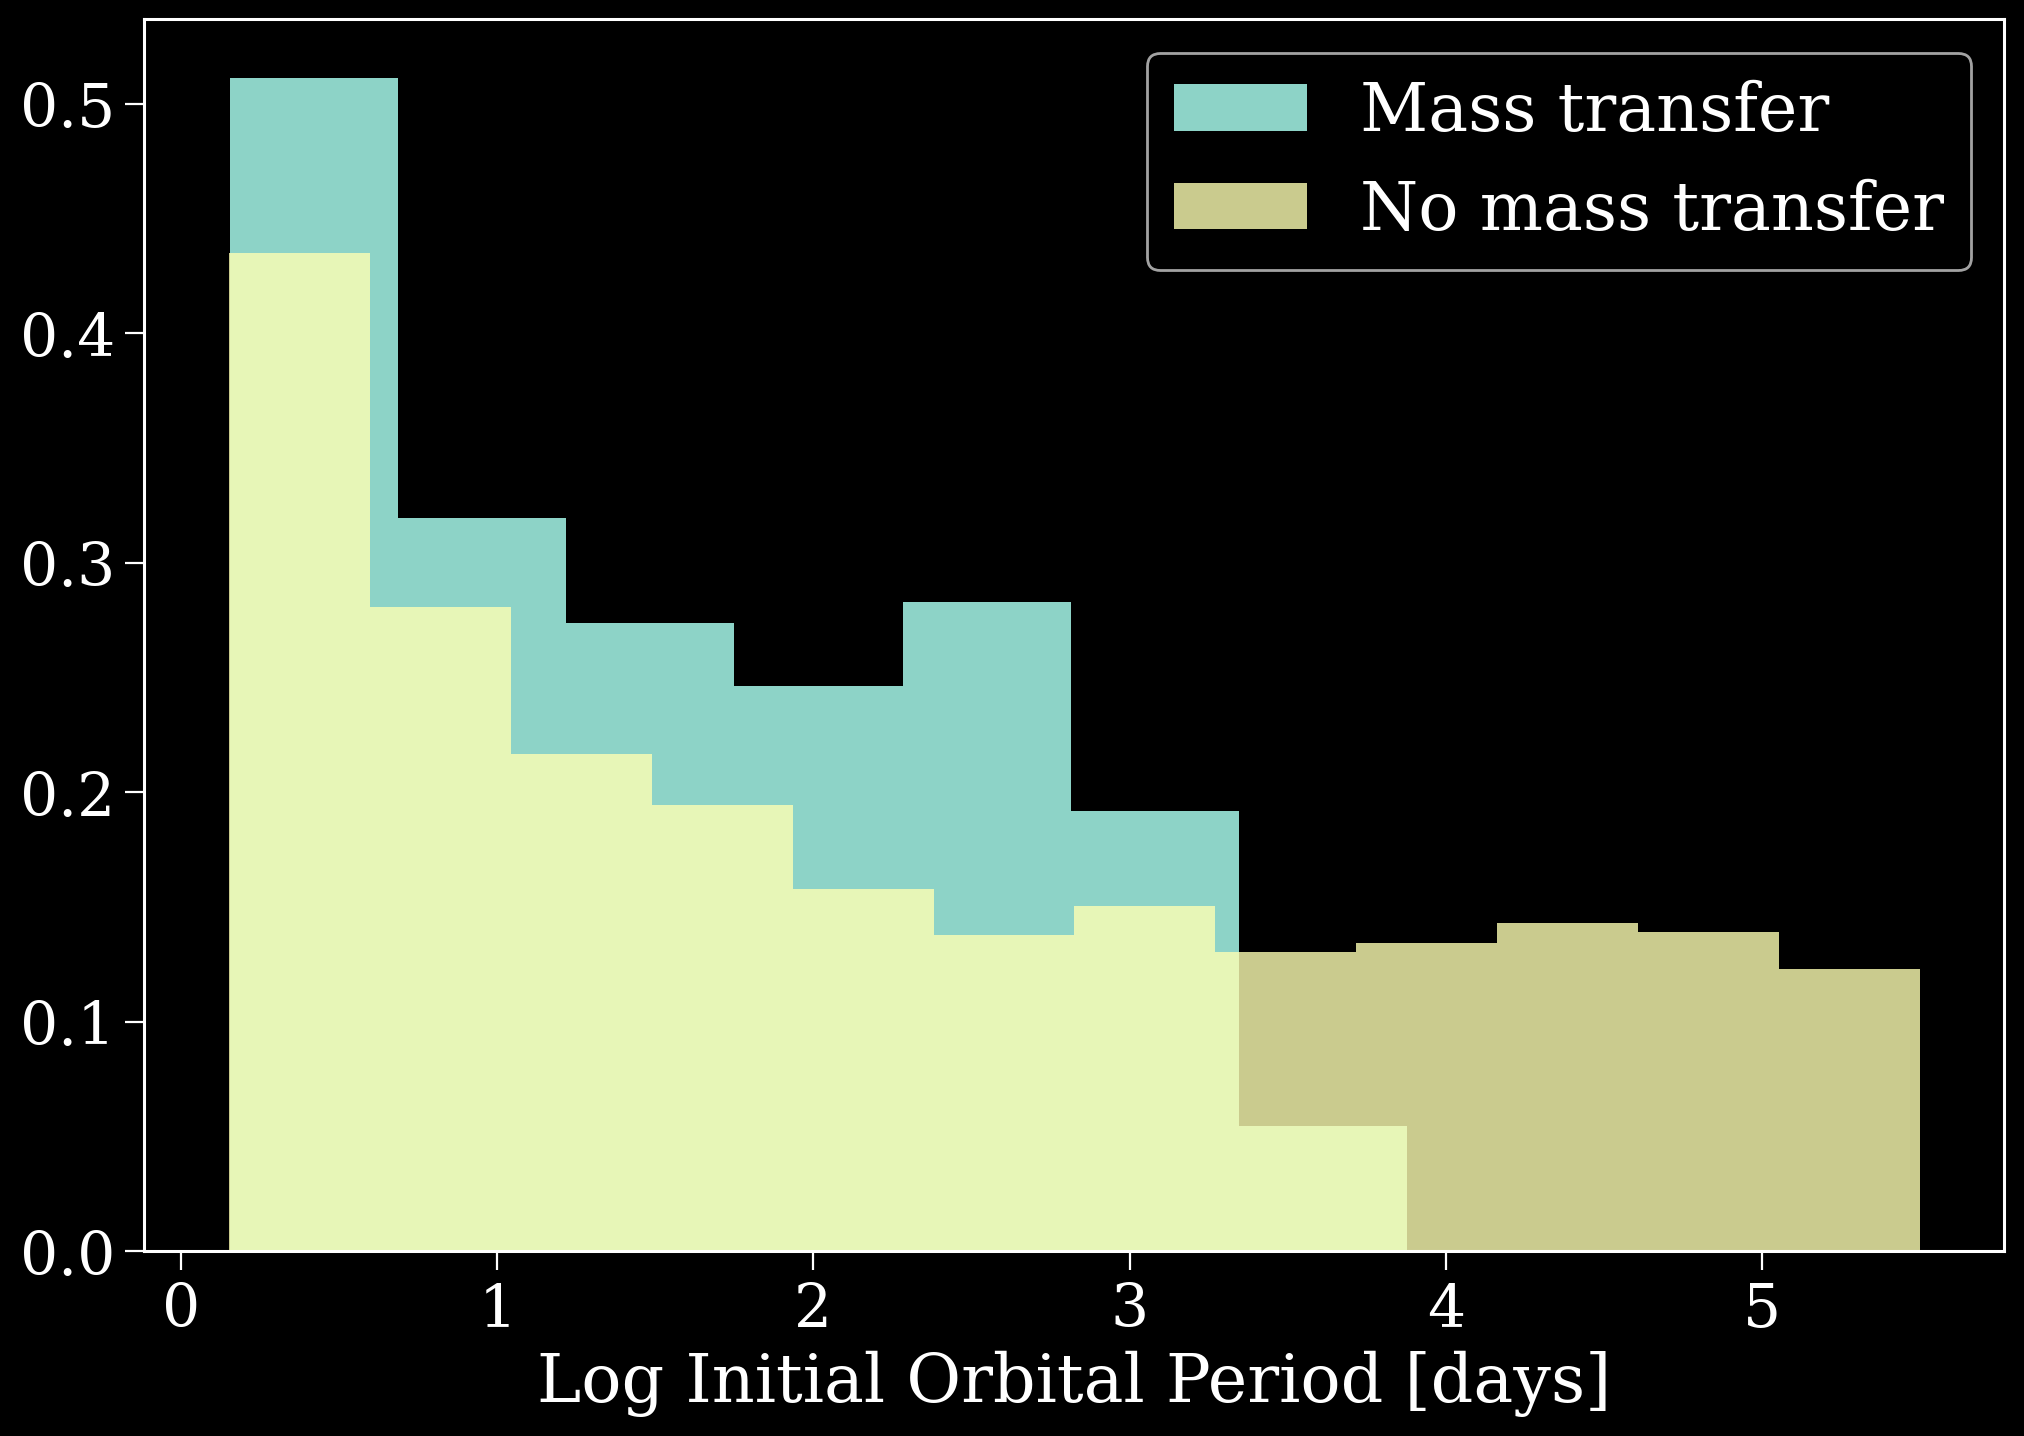

In [9]:
experienced_mt = p.initC["bin_num"].isin(mt_bin_nums)
plt.hist(np.log10(p.initC["porb"][experienced_mt]), bins="fd", density=True, label="Mass transfer")
plt.hist(np.log10(p.initC["porb"][~experienced_mt]), bins="fd", density=True, label="No mass transfer", alpha=0.8)
plt.legend()
plt.xlabel("Log Initial Orbital Period [days]");

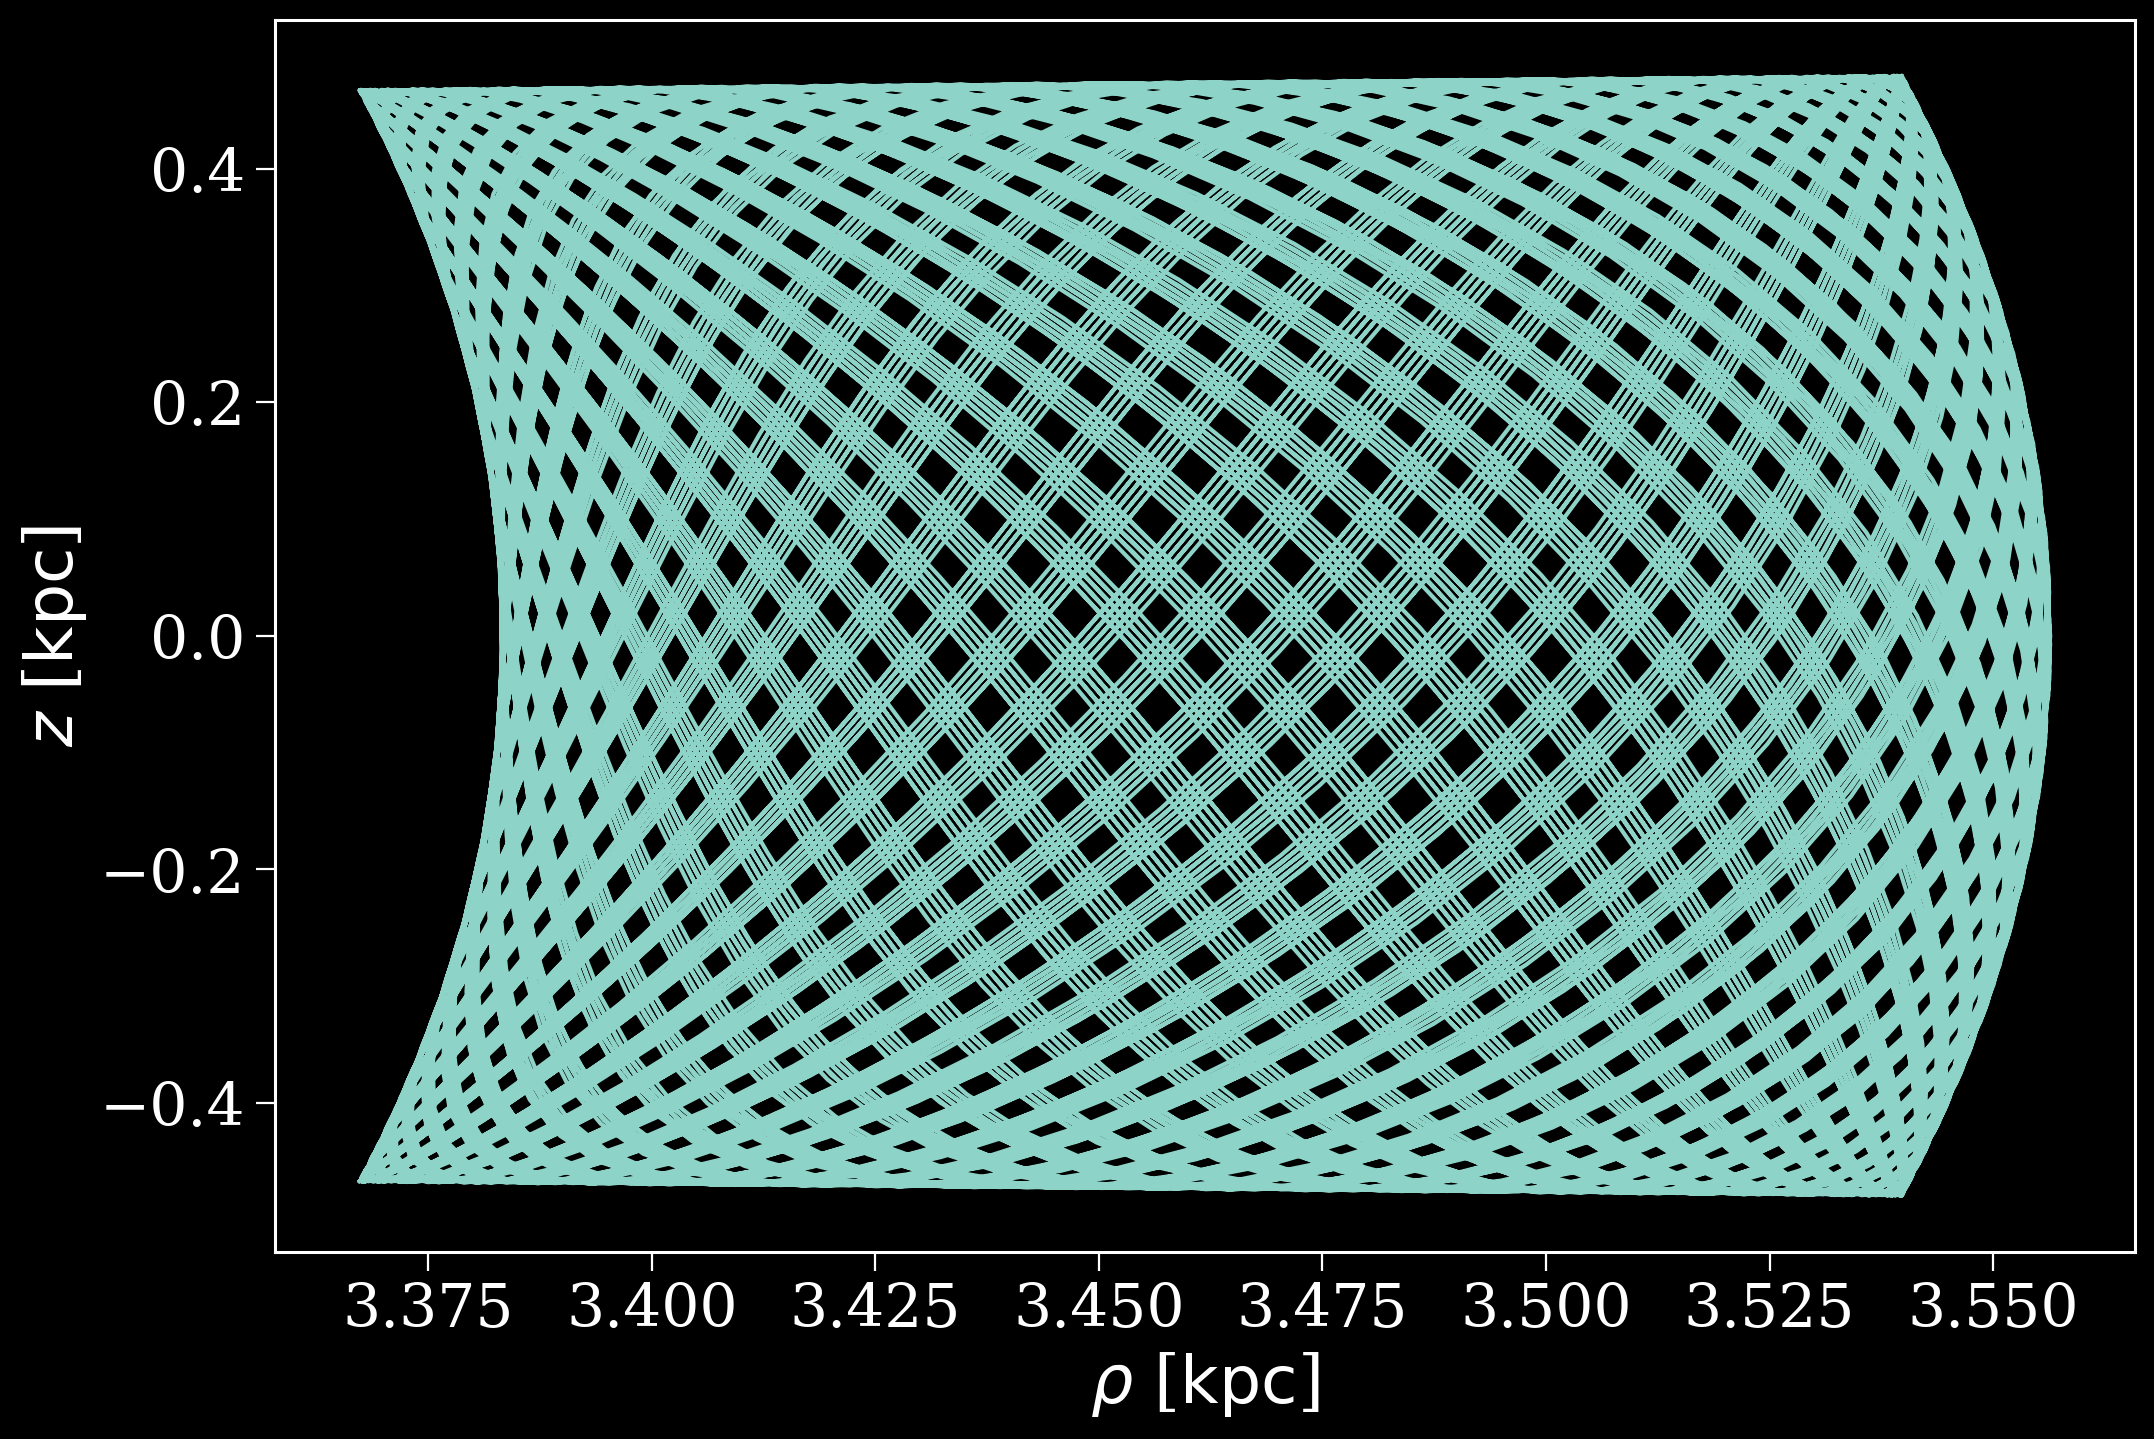

In [14]:
fig, ax = plt.subplots()
nice_orbits = p.orbits[(p.final_bpp["sep"] >= 0.0) & (p.final_coords[0].icrs.distance < 5 * u.kpc)]
nice_orbit = np.random.choice(nice_orbits)
nice_orbit.cylindrical.plot(["rho", "z"], axes=ax)
plt.show()

In [15]:
disrupted = p.final_bpp["sep"] < 0.0
p.final_bpp[disrupted]

,tphys,mass_1,mass_2,kstar_1,kstar_2,sep,porb,ecc,RRLO_1,RRLO_2,evol_type,aj_1,aj_2,tms_1,tms_2,massc_1,massc_2,rad_1,rad_2,mass0_1,mass0_2,lum_1,lum_2,teff_1,teff_2,radc_1,radc_2,menv_1,menv_2,renv_1,renv_2,omega_spin_1,omega_spin_2,B_1,B_2,bacc_1,bacc_2,tacc_1,tacc_2,epoch_1,epoch_2,bhspin_1,bhspin_2,bin_num,metallicity
105,2936.133635,1.260782,1.074266,13.0,11.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,2905.084677,2822.257916,1.000000e+10,1.000000e+10,1.260782,1.074266,0.000014,0.007211,2.961393,1.074266,2.767842e-09,1.168398e-04,11239.342402,7098.639076,0.000014,0.007211,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.005344e+07,8.525113e-06,1.112614e+12,0.000000e+00,0.0,0.0,0.0,0.0,31.048958,113.875718,0.0,0.0,105,0.004264
464,10344.774240,1.447710,2.992829,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10330.882036,10321.843070,1.000000e+10,1.000000e+10,1.447710,2.992829,0.000014,0.000014,4.217077,17.921013,2.401109e-10,3.912825e-10,6099.701408,6891.728963,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.651210e+07,1.049846e+07,4.602762e+10,7.243134e+10,0.0,0.0,0.0,0.0,13.892204,22.931170,0.0,0.0,464,0.008847
482,1870.143616,1.277584,3.780575,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1845.779564,1842.438115,1.000000e+10,1.000000e+10,1.277584,3.780575,0.000014,0.000016,2.440043,18.531816,6.917532e-09,1.000000e-10,14131.666638,4579.391191,0.000014,0.000016,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.851800e+06,2.000000e+08,3.302961e+12,0.000000e+00,0.0,0.0,0.0,0.0,24.364052,27.705501,0.0,0.0,482,0.006497
576,9857.998482,1.369001,1.289699,13.0,13.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,9834.401331,9832.266767,1.000000e+10,1.000000e+10,1.369001,1.289699,0.000014,0.000014,11.275855,10.662043,2.552258e-10,2.453296e-10,6193.508537,6132.577986,0.000014,0.000014,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,7.382180e+06,3.923182e+06,1.231310e+11,2.316921e+11,0.0,0.0,0.0,0.0,23.597150,25.731714,0.0,0.0,576,0.000558
639,9483.359802,1.260782,3.583740,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,9465.337503,9459.544632,1.000000e+10,1.000000e+10,1.260782,3.583740,0.000014,0.000015,3.078641,18.896260,2.607274e-10,1.000000e-10,6226.618359,4703.470916,0.000014,0.000015,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,5.122365e+07,2.000000e+08,1.953495e+10,0.000000e+00,0.0,0.0,0.0,0.0,18.022299,23.815170,0.0,0.0,639,0.009121
698,1329.546272,1.260782,2.036507,13.0,4.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1305.064286,1338.596392,1.000000e+10,1.262857e+03,1.260782,0.379347,0.000014,15.616931,2.793923,2.039105,1.371497e-08,4.457487e+01,16768.891216,3790.917091,0.000014,0.084186,1.000000e-10,5.519370e-03,1.000000e-10,3.731465e+00,8.305135e+05,7.714862e-03,2.697592e+13,0.000000e+00,0.0,0.0,0.0,0.0,24.481987,-9.050119,0.0,0.0,698,0.030000
720,8915.256956,2.034887,6.943457,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,8906.442407,8899.300456,1.000000e+10,1.000000e+10,2.034887,6.943457,0.000014,0.000029,5.857644,23.156997,4.058293e-10,1.000000e-10,6954.908915,3379.082643,0.000014,0.000029,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.860799e+07,2.000000e+08,2.574820e+10,0.000000e+00,0.0,0.0,0.0,0.0,8.814549,15.956500,0.0,0.0,720,0.007730
1121,1117.367648,1.277584,5.632801,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,1103.055676,1100.447037,1.000000e+10,1.000000e+10,1.277584,5.632801,0.000014,0.000024,3.655898,25.008880,1.936939e-08,1.000000e-10,18280.353255,3751.668658,0.000014,0.000024,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,4.953968e+06,2.000000e+08,4.991060e+12,0.000000e+00,0.0,0.0,0.0,0.0,14.311973,16.920611,0.0,0.0,1121,0.009217
1175,10183.158563,2.540461,8.207337,13.0,14.0,-1.0,-1.0,-1.0,0.0001,0.0001,10.0,10173.744321,10165.368275,1.000000e+10,1.000000e+10,2.540461,8.207337,0.000014,0.000035,6.983798,22.083236,3.608775e-10,1.000000e-10,6753.758617,3108.032447,0.000014,0.000035,1.000000e-10,1.000000e-10,1.000000e-10,1.000000e-10,1.864923e+07,2.000000e+08,4.821468e+10,0.000000e+00,0.0,0.0,0.0,0

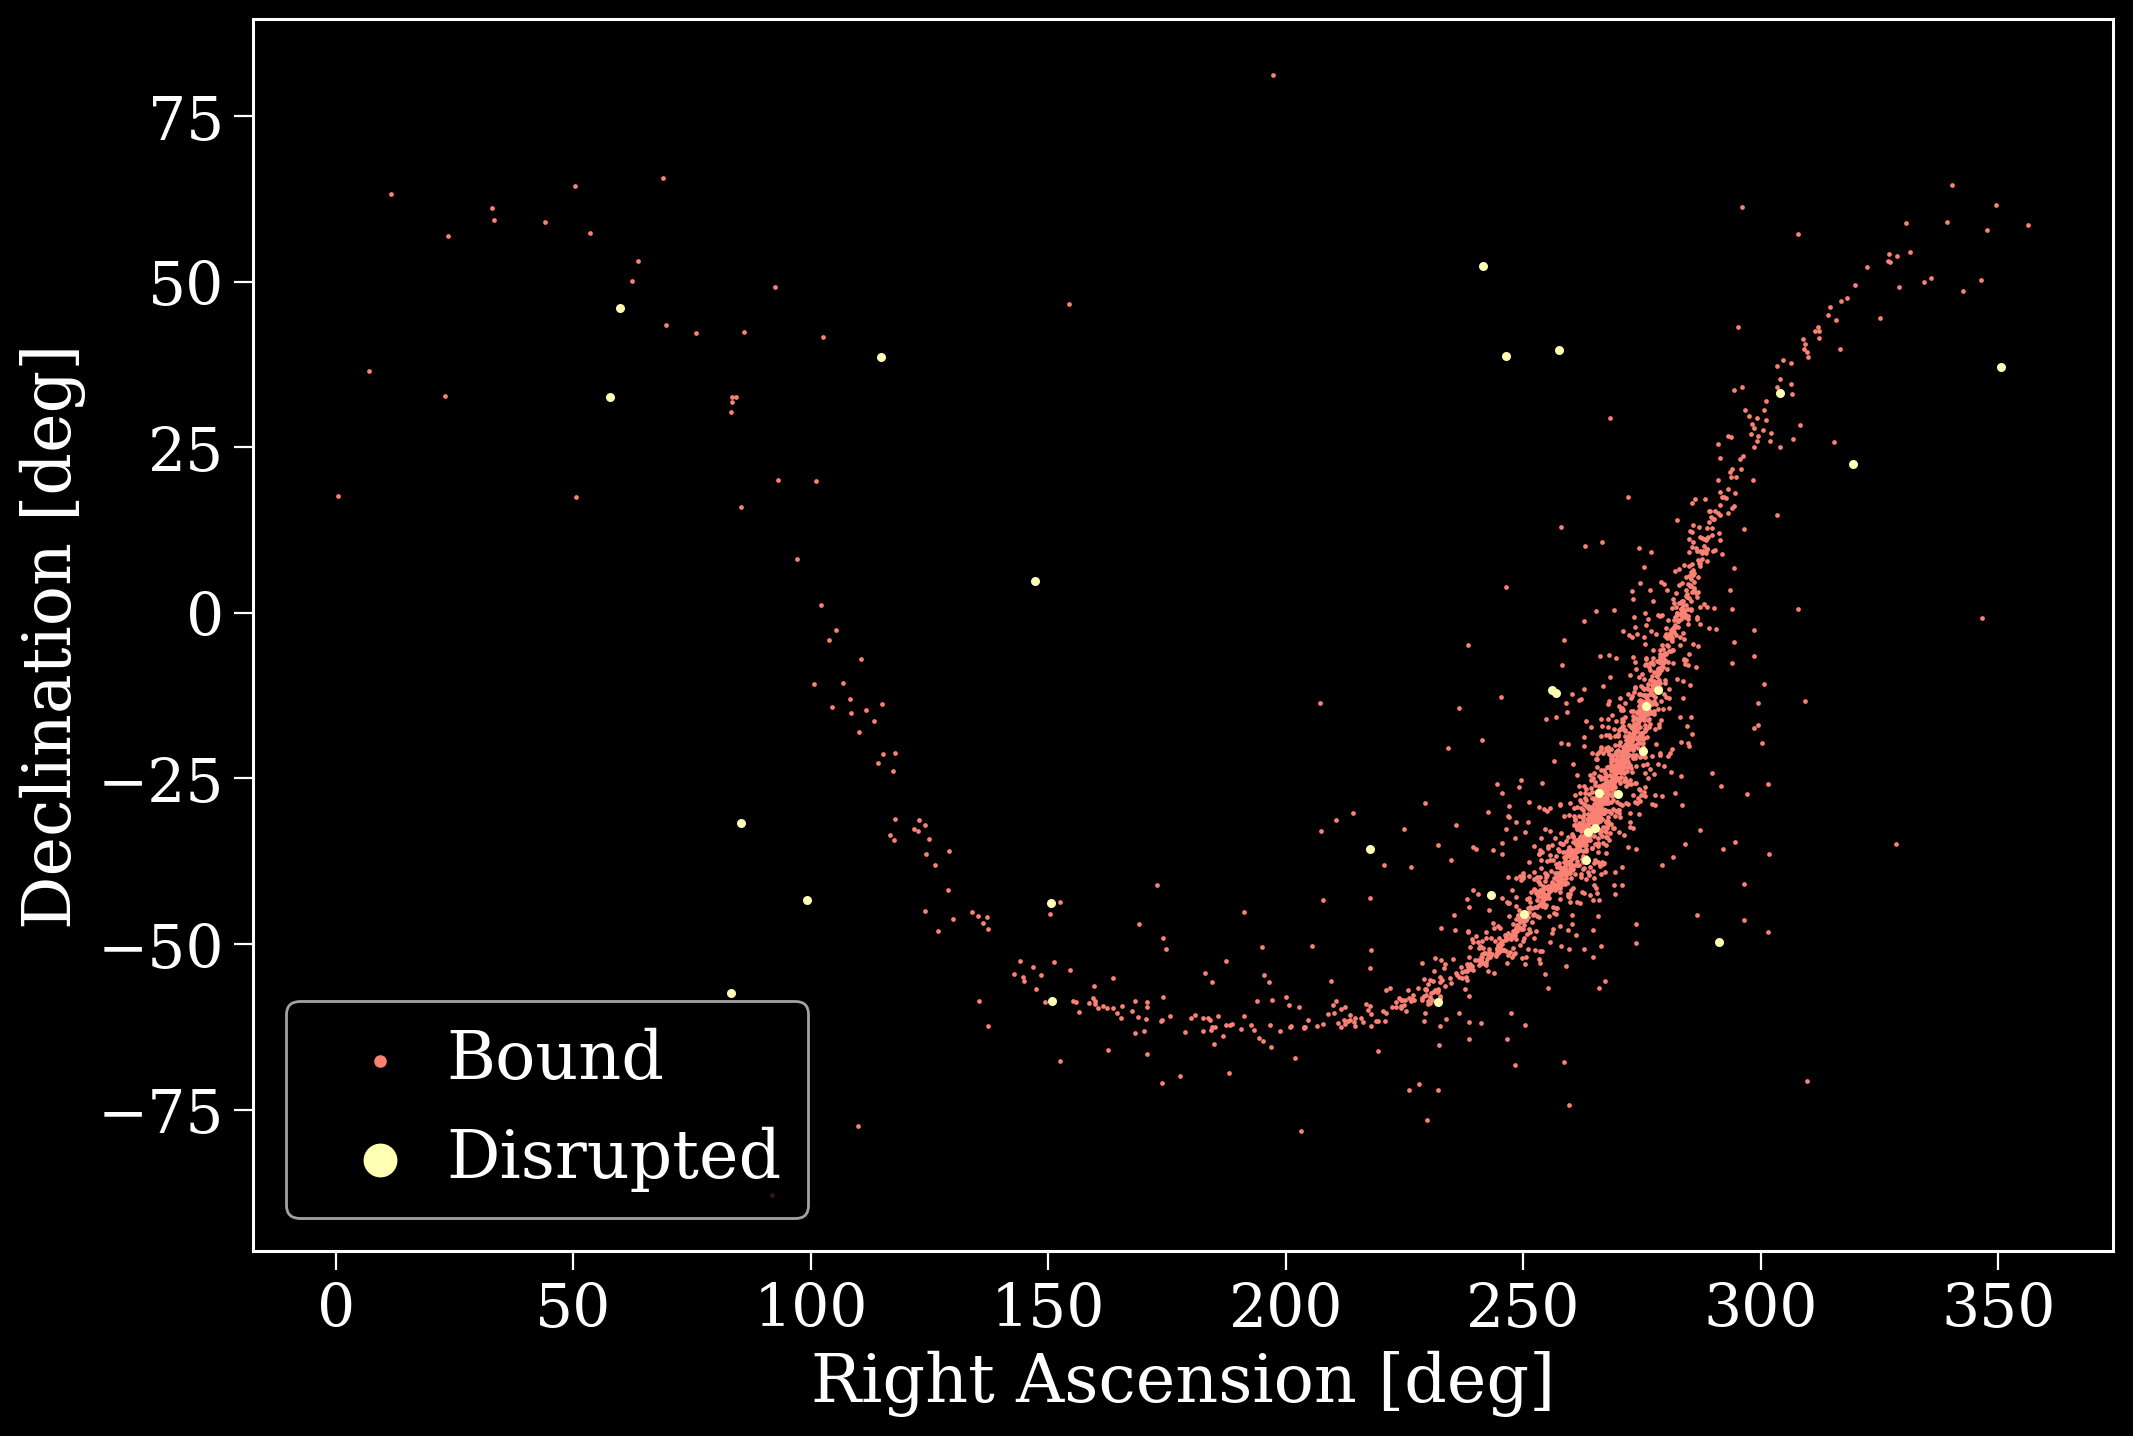

In [16]:
plt.scatter(p.final_coords[0][~disrupted].icrs.ra, p.final_coords[0][~disrupted].icrs.dec, s=0.5, c="C3", label="Bound")
plt.scatter(p.final_coords[0][disrupted].icrs.ra, p.final_coords[0][disrupted].icrs.dec, s=5, c="C1")
plt.scatter(p.final_coords[1][disrupted].icrs.ra, p.final_coords[1][disrupted].icrs.dec, s=5, c="C1", label="Disrupted")
plt.xlabel("Right Ascension [deg]")
plt.ylabel("Declination [deg]")
plt.legend(markerscale=5, handletextpad=.0)
plt.show()

# Classify population
The Population can also classify the present-day state of each binary. You can autogenerate these classes by accessing ``p.classes``

In [17]:
p.classes

,dco,co-1,co-2,xrb,walkaway-t-1,walkaway-t-2,runaway-t-1,runaway-t-2,walkaway-o-1,walkaway-o-2,runaway-o-1,runaway-o-2,widow-1,widow-2,stellar-merger-co-1,stellar-merger-co-2,pisn-1,pisn-2
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2023,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2024,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2025,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


This table has a flag for each class and for each binary. We can do some pandas DataFrame manipulation to get some statistics for the different classes

In [18]:
p.classes.astype(int).sum()

dco                     0
co-1                   15
co-2                   11
xrb                     0
walkaway-t-1            0
walkaway-t-2            0
runaway-t-1             0
runaway-t-2             1
walkaway-o-1            0
walkaway-o-2            0
runaway-o-1             0
runaway-o-2             1
widow-1                 0
widow-2                 1
stellar-merger-co-1     5
stellar-merger-co-2     8
pisn-1                  0
pisn-2                  0
dtype: int64

# Predict observables
You can also use the Population class to predict what we might actually observe for this population in different filters. This uses dust maps to correct for extinction, applies bolometric corrections and blends the stars if necessary.

In [19]:
p.observables

,Av_1,Av_2,M_abs_1,m_app_1,M_abs_2,m_app_2,J_app_1,J_app_2,J_abs_1,J_abs_2,H_app_1,H_app_2,H_abs_1,H_abs_2,K_app_1,K_app_2,K_abs_1,K_abs_2,G_app_1,G_app_2,teff_obs,log_g_obs,secondary_brighter,G_abs_1,G_abs_2,BP_app_1,BP_app_2,BP_abs_1,BP_abs_2,RP_app_1,RP_app_2,RP_abs_1,RP_abs_2
0,1.056,6.0,10.635458,24.301865,12.609938,26.276345,22.861135,inf,8.890302,inf,22.054300,inf,8.195538,inf,21.768745,inf,7.978372,inf,25.734580,inf,3429.553444,5.091846,False,11.338464,inf,27.161667,inf,12.473445,inf,24.621618,inf,10.322741,inf
1,3.861,6.0,11.836176,26.037615,11.993650,26.195089,24.690466,inf,9.137425,inf,23.558254,inf,8.490780,inf,23.013641,inf,8.252751,inf,29.486673,inf,2901.852374,5.132033,False,12.721606,inf,33.350464,inf,15.025642,inf,28.076163,inf,11.435898,inf
2,4.851,6.0,14.631135,29.604722,7.751504,22.725091,22.893676,inf,6.197689,inf,21.583689,inf,5.519228,inf,21.053015,inf,5.373284,inf,27.061747,inf,4095.153418,4.766806,True,8.074548,inf,29.501752,inf,8.818156,inf,25.755180,inf,7.251683,inf
3,3.036,6.0,9.020085,23.979908,inf,inf,27.179674,inf,11.337073,inf,26.869218,inf,11.352793,inf,26.763587,inf,11.445739,inf,28.613066,inf,18724.536770,7.933555,False,10.883200,inf,29.116408,inf,10.757401,inf,27.977646,inf,11.036592,inf
4,6.000,6.0,6.671490,21.576112,8.230835,23.135457,21.538202,inf,4.911214,inf,20.239890,inf,4.243737,inf,19.736345,inf,4.125140,inf,25.671750,inf,4438.912474,4.610990,False,6.699080,inf,28.024858,inf,7.365482,inf,24.374754,inf,5.924354,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022,1.749,6.0,9.719663,23.139303,10.709775,24.129415,21.837111,inf,7.667500,inf,20.916909,inf,6.993429,inf,20.538975,inf,6.782051,inf,24.856099,inf,3661.739297,5.007196,False,9.917815,inf,26.292776,inf,10.905657,inf,23.740540,inf,8.964483,inf
2023,6.000,6.0,3.752256,18.369904,8.262655,22.880303,18.909793,inf,2.563725,inf,17.899020,inf,2.186684,inf,17.460525,inf,2.135959,inf,22.644293,inf,5549.121214,3.993423,False,3.673544,inf,24.599283,inf,4.030740,inf,21.405348,inf,3.150948,inf
2024,6.000,6.0,6.898514,21.526938,8.983140,23.611564,21.533545,inf,5.183290,inf,20.223882,inf,4.504190,inf,19.714061,inf,4.379142,inf,25.717897,inf,4334.512630,4.643355,False,7.062683,inf,28.139560,inf,7.779581,inf,24.412617,inf,6.255134,inf
2025,6.000,6.0,4.880244,20.732890,8.182562,24.035207,21.337866,inf,3.755735,inf,20.340251,inf,3.392792,inf,19.904612,inf,3.345144,inf,25.033679,inf,5835.672717,4.459928,False,4.787157,inf,26.952615,inf,5.097296,inf,23.800452,inf,4.305755,inf


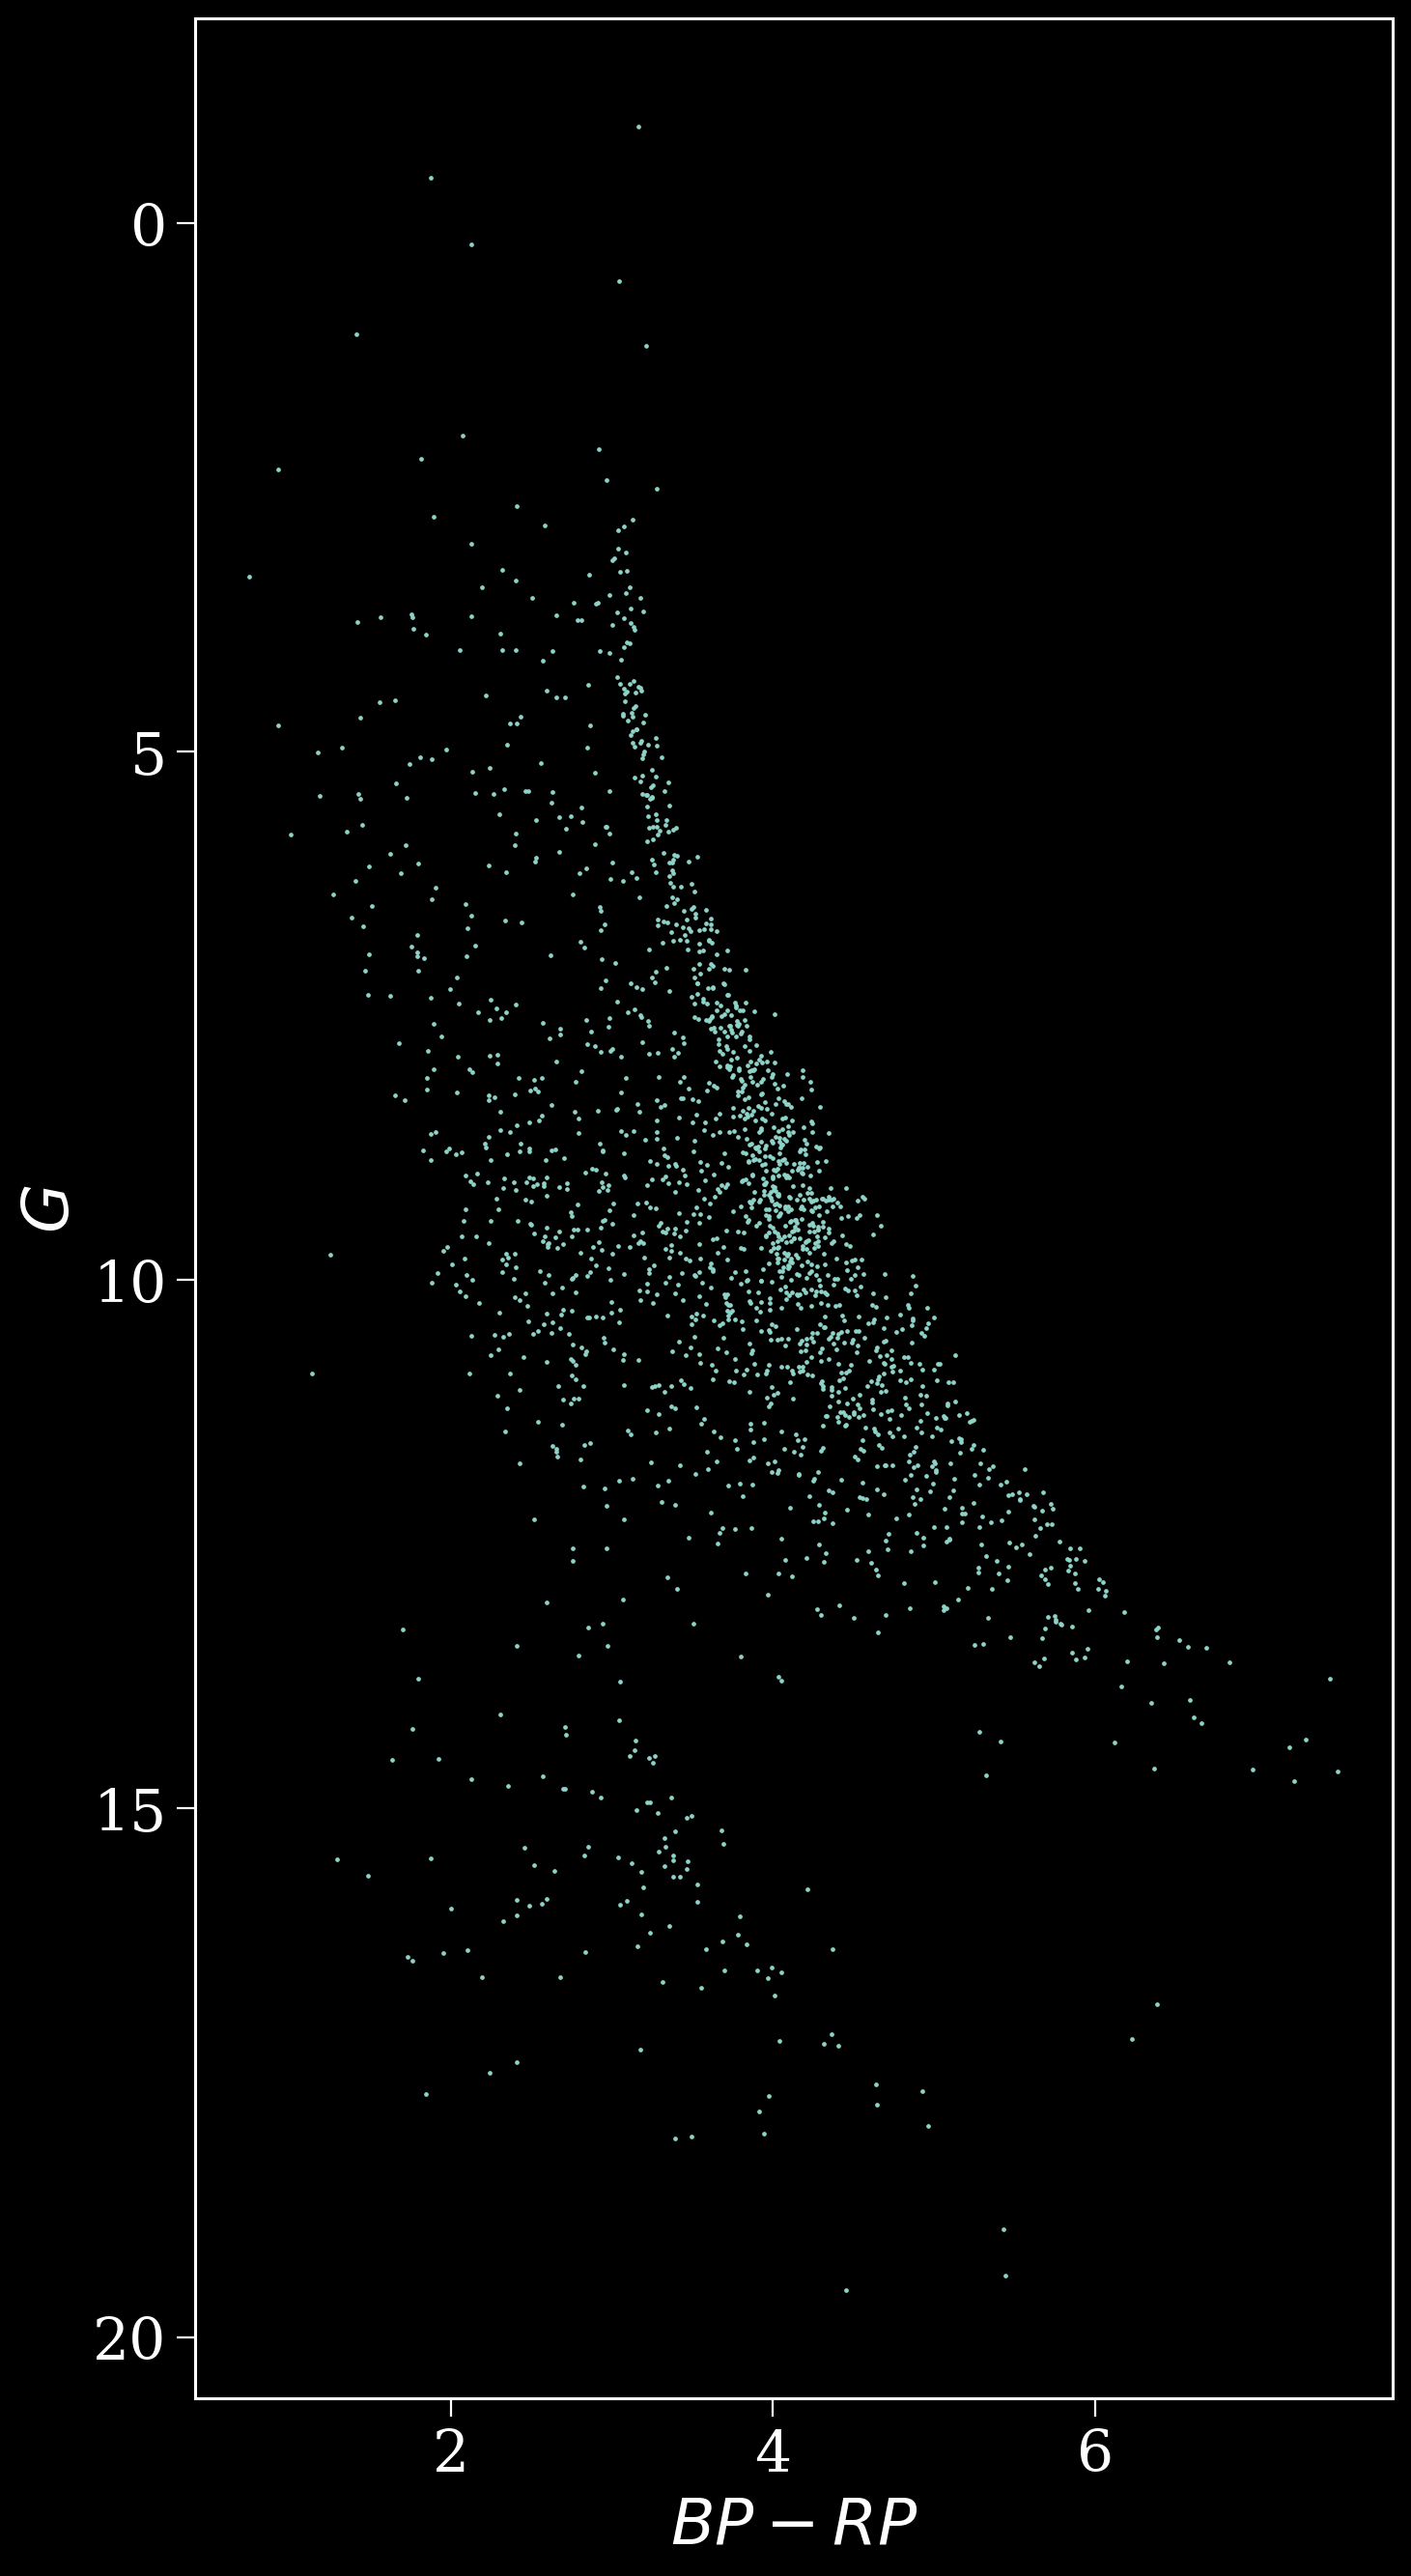

In [20]:
plt.figure(figsize=(8, 16))
plt.scatter(p.observables["BP_app_1"] - p.observables["RP_app_1"],
            p.observables["G_abs_1"], s=0.5)
plt.ylim(reversed(plt.ylim()))
plt.xlabel(r"$BP-RP$")
plt.ylabel(r"$G$")
plt.show()